# 2: Presentación
En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos: 1- El titanic fue un accidente con una tasa de mortalidad alta. 2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero... 3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar... 4- ... las diferencias de tasas de supervivencia entre mujeres y niños. 5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/titanic.csv")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
data.dropna(subset=["survived", "pclass", "sex", "age", "embarked"], inplace=True)

In [16]:
# Añado columnas AgeGroup + EmbarkedPort + SurvivalStatus + Class
data["AgeGroup"] = pd.cut(data["age"], bins=[0, 12, 18, 60, 100], labels=["Child", "Teen", "Adult", "Senior"])
data["EmbarkedPort"] = data["embarked"].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
data["SurvivalStatus"] = data["survived"].map({1: "Survived", 0: "Died"})
data["Class"] = data["pclass"].map({1: "First", 2: "Second", 3: "Third"})

In [17]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,AgeGroup,EmbarkedPort,SurvivalStatus,Class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult,Southampton,Died,Third
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Cherbourg,Survived,First
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,Southampton,Survived,Third
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Southampton,Survived,First
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Southampton,Died,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,Adult,Queenstown,Died,Third
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult,Southampton,Died,Second
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Adult,Southampton,Survived,First
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult,Cherbourg,Survived,First


/tmp/ipykernel_2393591/2111047429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="SurvivalStatus", palette="coolwarm")


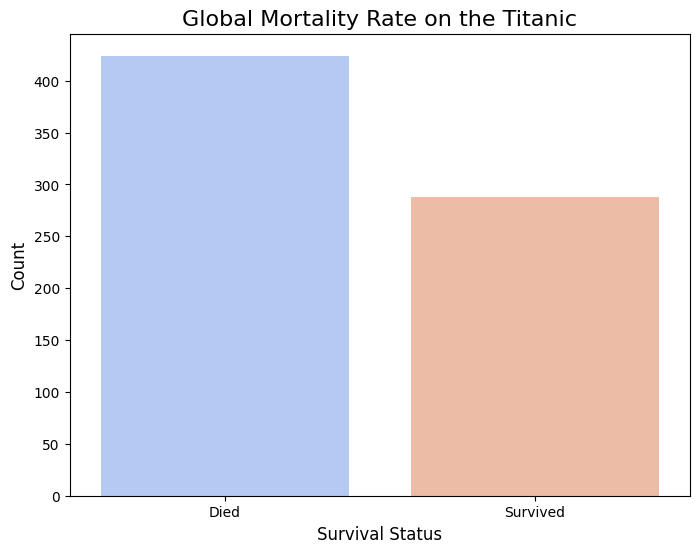

In [19]:
# Slide 1: Global mortality rate
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="SurvivalStatus", palette="coolwarm")
plt.title("Global Mortality Rate on the Titanic", fontsize=16)
plt.xlabel("Survival Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

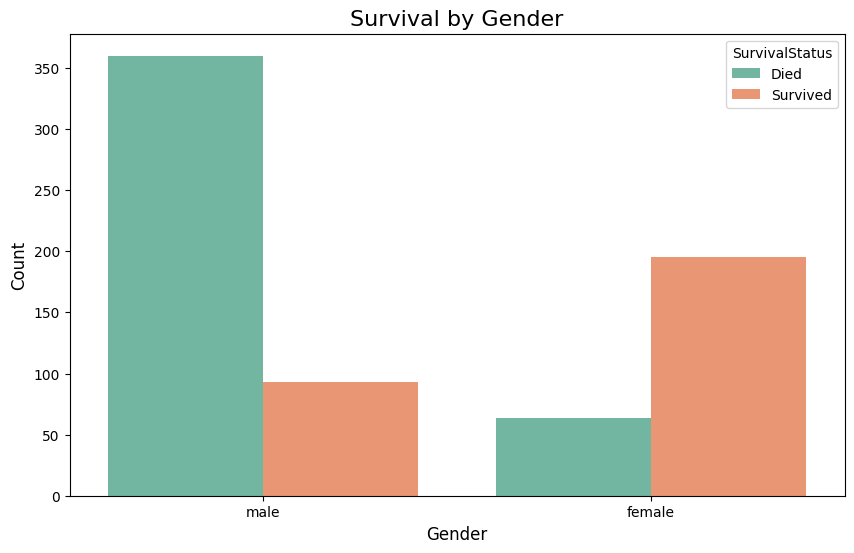

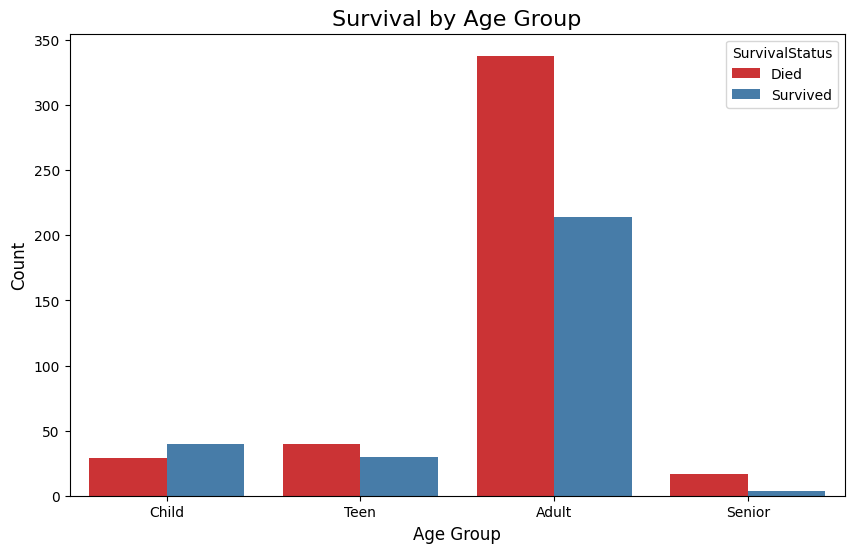

In [21]:
# Slide 2: Survival by gender and age group
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="sex", hue="SurvivalStatus", palette="Set2")
plt.title("Survival by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="AgeGroup", hue="SurvivalStatus", palette="Set1")
plt.title("Survival by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

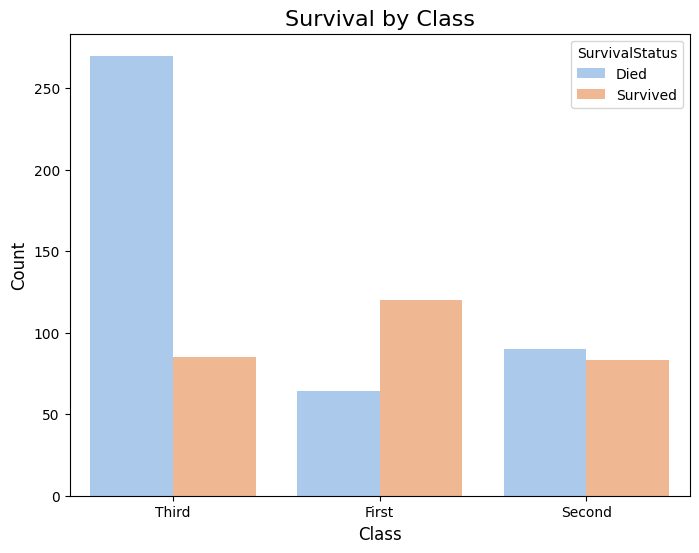

In [22]:
# Slide 3: Survival by class
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="class", hue="SurvivalStatus", palette="pastel")
plt.title("Survival by Class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

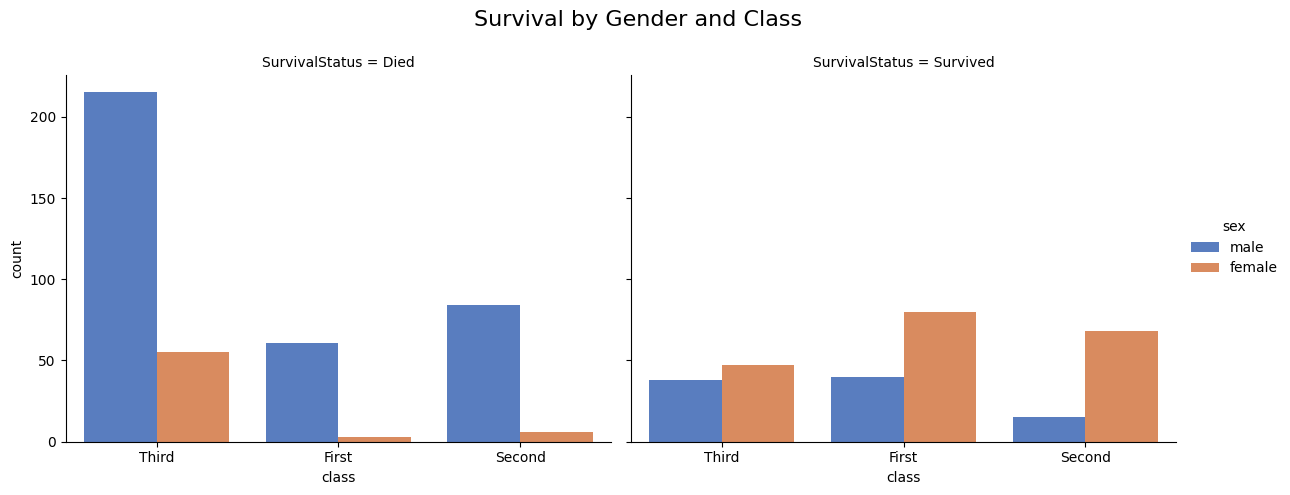

In [23]:
# Slide 4: Survival by gender and class
sns.catplot(data=data, x="class", hue="sex", col="SurvivalStatus", kind="count", palette="muted", height=5, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle("Survival by Gender and Class", fontsize=16)
plt.show()

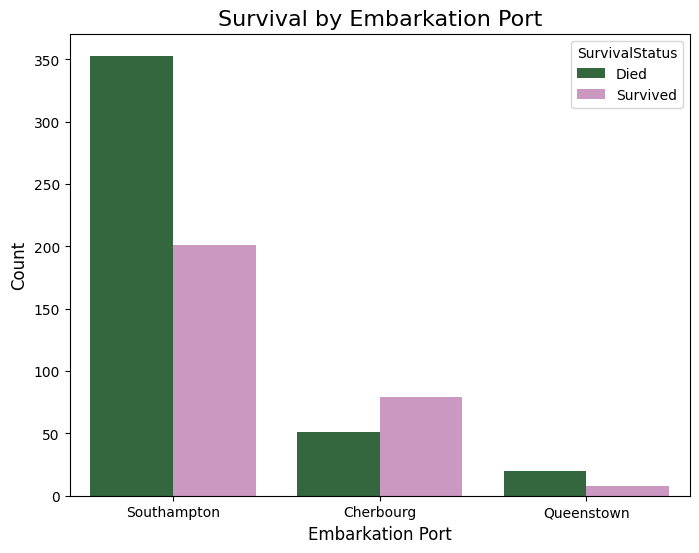

In [24]:
# Slide 5: Survival by embarkation port
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="EmbarkedPort", hue="SurvivalStatus", palette="cubehelix")
plt.title("Survival by Embarkation Port", fontsize=16)
plt.xlabel("Embarkation Port", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

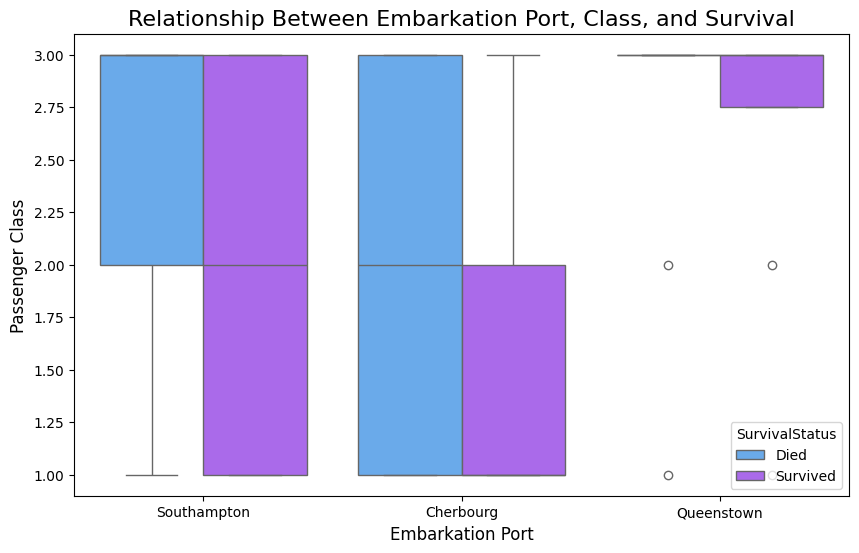

In [25]:
# Correlation between embarkation port, class, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="EmbarkedPort", y="pclass", hue="SurvivalStatus", palette="cool")
plt.title("Relationship Between Embarkation Port, Class, and Survival", fontsize=16)
plt.xlabel("Embarkation Port", fontsize=12)
plt.ylabel("Passenger Class", fontsize=12)
plt.show()

Visualización presentacion: https://view.genially.com/675b30c6760e22b55530593b